In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [20]:
dataset = pd.read_csv(r"C:\Users\Jake Hinkle\Downloads\All Regions.csv")
dataset['CompletedYear']=pd.to_datetime(dataset['CompletedYear'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['CompletedYear'])

In [21]:
from datetime import datetime
indexedDataset.head(5)

,ShortTons
CompletedYear,
2018-01-01,7787
2018-01-02,67
2018-01-03,32869
2018-01-04,66738
2018-01-05,8505


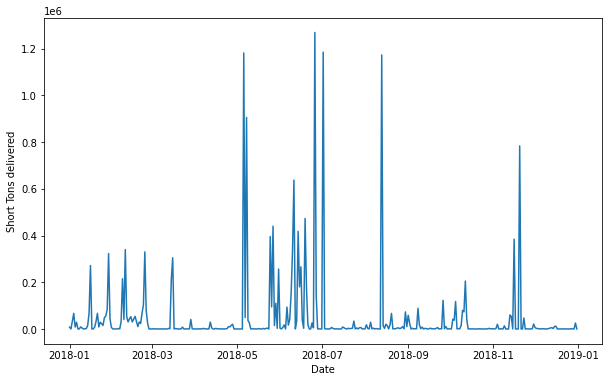

In [22]:
plt.xlabel("Date")
plt.ylabel("Short Tons delivered")
plt.plot(indexedDataset)

In [23]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 ShortTons
CompletedYear             
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
...                    ...
2018-12-27     1280.583333
2018-12-28      317.000000
2018-12-29      310.083333
2018-12-30     2433.833333
2018-12-31     2433.083333

[365 rows x 1 columns]                  ShortTons
CompletedYear             
2018-01-01             NaN
2018-01-02             NaN
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
...                    ...
2018-12-27     3362.454446
2018-12-28      412.907870
2018-12-29      417.524405
2018-12-30     7274.717812
2018-12-31     7274.987391

[365 rows x 1 columns]


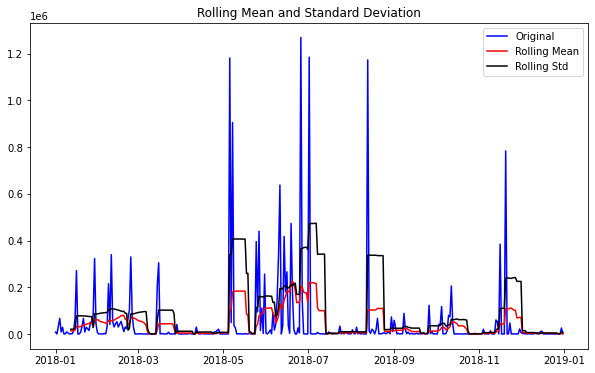

In [24]:
orig=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean')
std=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [27]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test:')
dftest=adfuller(indexedDataset['ShortTons'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print (dfoutput)

Results of Dickey-Fuller test:
Test Statistic                -5.985602e+00
p-value                        1.795331e-07
#lags used                     5.000000e+00
Number of Observations Used    3.590000e+02
Critical Value (1%)           -3.448697e+00
Critical Value (5%)           -2.869625e+00
Critical Value (10%)          -2.571077e+00
dtype: float64


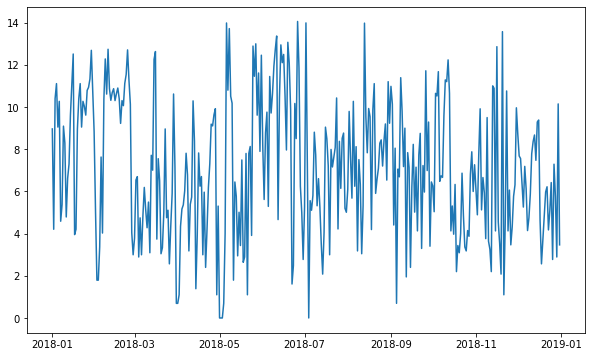

In [28]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

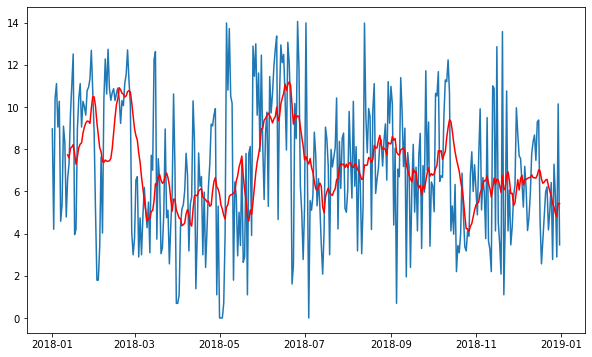

In [29]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [30]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,ShortTons
CompletedYear,
2018-01-12,-1.108698
2018-01-13,-0.290606
2018-01-14,1.576673
2018-01-15,3.021776
2018-01-16,4.292880
2018-01-17,-3.842720
2018-01-18,-3.083993
2018-01-19,1.306922
2018-01-20,2.328245


In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
    std=plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller test:')
    dftest=adfuller(timeseries['ShortTons'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print (dfoutput)

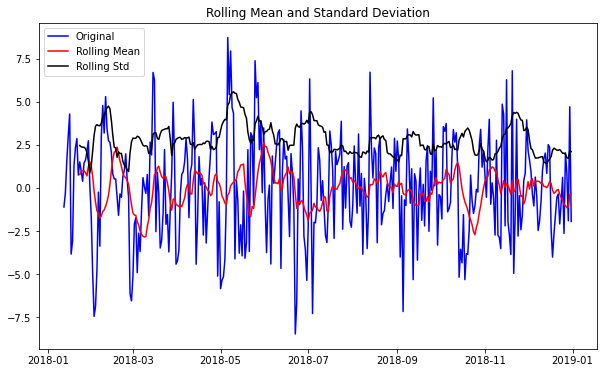

Results of Dickey-Fuller test:
Test Statistic                -8.105171e+00
p-value                        1.268565e-12
#lags used                     8.000000e+00
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


In [33]:
test_stationarity(datasetLogScaleMinusMovingAverage)

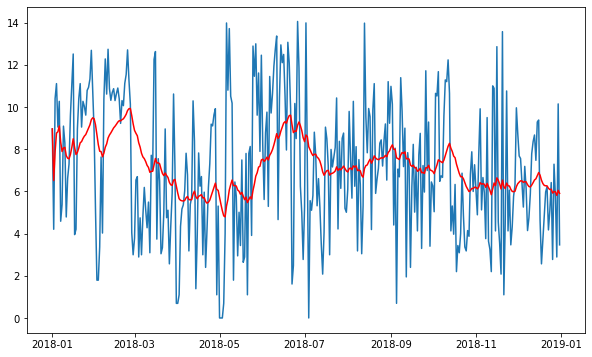

In [34]:
EDWeightedAverage=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(EDWeightedAverage, color='red')

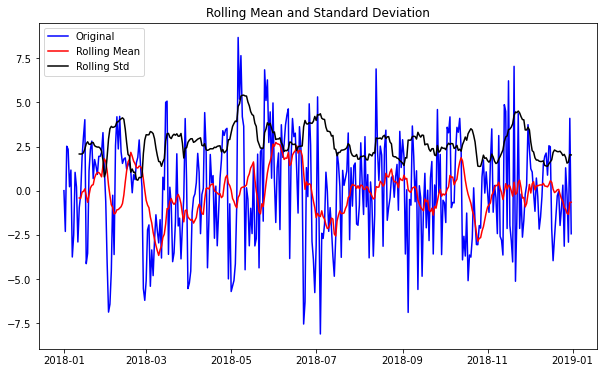

Results of Dickey-Fuller test:
Test Statistic                -1.025467e+01
p-value                        4.392997e-18
#lags used                     1.000000e+00
Number of Observations Used    3.630000e+02
Critical Value (1%)           -3.448494e+00
Critical Value (5%)           -2.869535e+00
Critical Value (10%)          -2.571029e+00
dtype: float64


In [35]:
datasetLogScaleMinusMovingEDAverage=indexedDataset_logScale-EDWeightedAverage
test_stationarity(datasetLogScaleMinusMovingEDAverage)

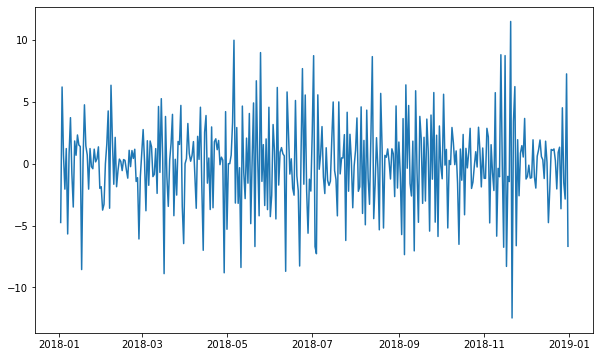

In [36]:
datasetLogDiffShifting=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

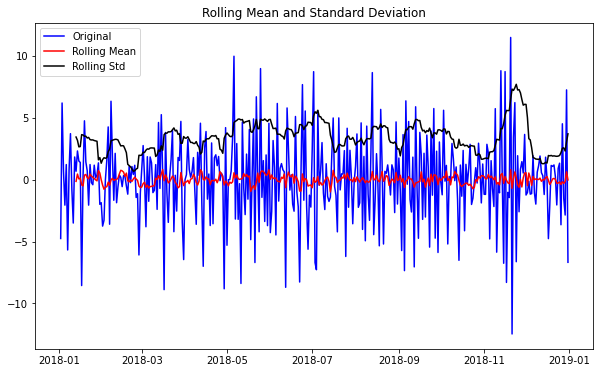

Results of Dickey-Fuller test:
Test Statistic                -9.342321e+00
p-value                        8.729787e-16
#lags used                     1.000000e+01
Number of Observations Used    3.530000e+02
Critical Value (1%)           -3.449011e+00
Critical Value (5%)           -2.869763e+00
Critical Value (10%)          -2.571151e+00
dtype: float64


In [37]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)